### Dataset Loading

In [2]:
import os
import shutil
import pandas as pd

from tensorflow.keras.preprocessing.image import ImageDataGenerator

from PIL import Image

In [3]:
responses_path = r"correlation_assignment\responses.csv"

df = pd.read_csv(responses_path)    

df["id"] = df["id"].astype(str) + ".png"

df[:5]

,id,corr
0,arjskzyc.png,-0.457810
1,jrsnrkcp.png,-0.523113
2,hycqmekg.png,-0.179033
3,cerpyxxj.png,0.251509
4,cohtzuog.png,0.353992


In [4]:
img_directory = r"correlation_assignment\images"

In [5]:
image = Image.open(os.path.join(img_directory, df['id'][0]))

print(image.size)

(150, 150)


In [6]:
data_generator = ImageDataGenerator(rescale=1./255, validation_split= 0.2)

train_generator = data_generator.flow_from_dataframe(
    dataframe=df,
    directory=img_directory,  
    x_col="id",
    y_col="corr",
    target_size=(150, 150),
    batch_size=32,
    class_mode="raw",
    color_mode="grayscale",
    subset="training"
)

val_generator = data_generator.flow_from_dataframe(
    dataframe=df,
    directory=img_directory,
    x_col="id",
    y_col="corr",
    target_size=(150, 150),
    batch_size=32,
    class_mode="raw",
    color_mode="grayscale",
    subset="validation"
)

Found 120000 validated image filenames.
Found 30000 validated image filenames.


### Model Setup

In [7]:
import tensorflow as tf
from tensorflow.keras import layers, models

import matplotlib.pyplot as plt

In [8]:
model = models.Sequential()

model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 1)))
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Conv2D(64, (3, 3), activation='relu'))

model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(1, activation='linear'))

model.compile(optimizer='adam', loss='mean_squared_error', metrics=['mse', 'mae'])

model.summary()


c:\Users\USER\Desktop\Code\Python\PicCollage\PicCollage_Assignment1\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 148, 148, 32)   │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 74, 74, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 72, 72, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 36, 36, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 34, 34, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 73984)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 64)             │     4,735,040 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 4,790,849 (18.28 MB)

 Trainable params: 4,790,849 (18.28 MB)

 Non-trainable params: 0 (0.00 B)

### Model Training

In [9]:
history = model.fit(
    train_generator,
    epochs=5,
    validation_data=val_generator
)

Epoch 1/5


c:\Users\USER\Desktop\Code\Python\PicCollage\PicCollage_Assignment1\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


3750/3750 ━━━━━━━━━━━━━━━━━━━━ 881s 234ms/step - loss: 0.2474 - mae: 0.0999 - mse: 0.2474 - val_loss: 0.0015 - val_mae: 0.0295 - val_mse: 0.0015
Epoch 2/5
3750/3750 ━━━━━━━━━━━━━━━━━━━━ 827s 220ms/step - loss: 0.0012 - mae: 0.0261 - mse: 0.0012 - val_loss: 0.0015 - val_mae: 0.0308 - val_mse: 0.0015
Epoch 3/5
3750/3750 ━━━━━━━━━━━━━━━━━━━━ 816s 218ms/step - loss: 8.0577e-04 - mae: 0.0215 - mse: 8.0577e-04 - val_loss: 5.6348e-04 - val_mae: 0.0177 - val_mse: 5.6348e-04
Epoch 4/5
3750/3750 ━━━━━━━━━━━━━━━━━━━━ 822s 219ms/step - loss: 6.4329e-04 - mae: 0.0193 - mse: 6.4329e-04 - val_loss: 8.0826e-04 - val_mae: 0.0224 - val_mse: 8.0826e-04
Epoch 5/5
3750/3750 ━━━━━━━━━━━━━━━━━━━━ 825s 220ms/step - loss: 5.3087e-04 - mae: 0.0176 - mse: 5.3087e-04 - val_loss: 6.0240e-04 - val_mae: 0.0191 - val_mse: 6.0240e-04


In [18]:
loss = history.history['loss']
val_loss = history.history['val_loss']
mae = history.history['mae']
val_mae = history.history['val_mae']
mse = history.history['mse']
val_mse = history.history['val_mse']
epochs = range(1, 5 + 1)

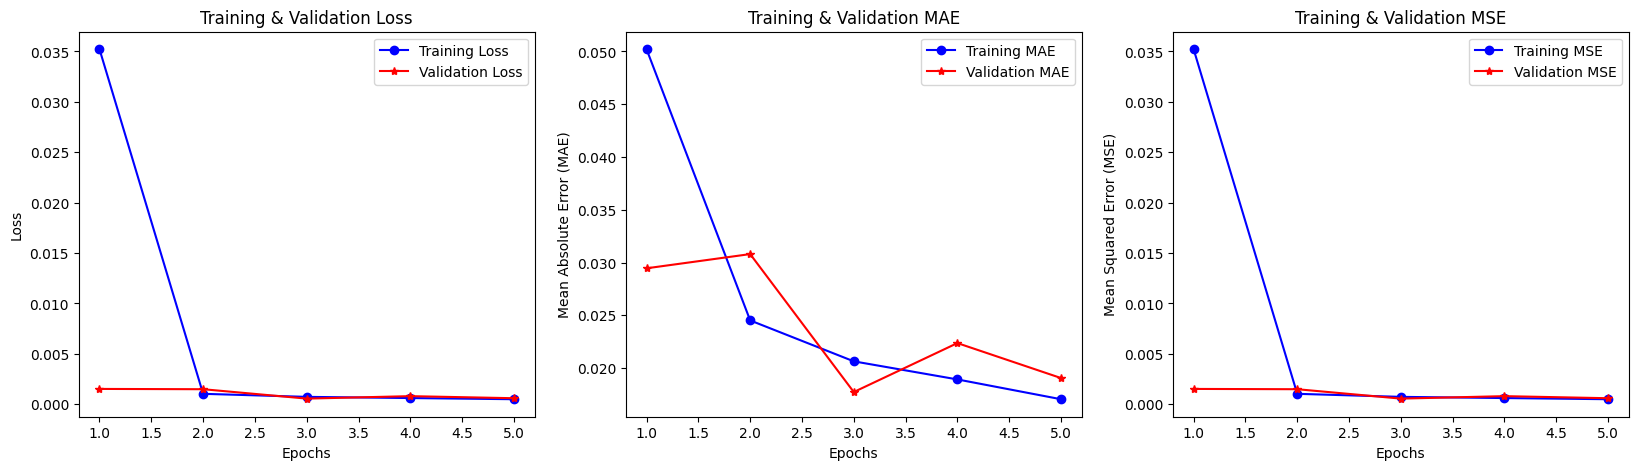

In [19]:
plt.figure(figsize=(20, 5))

plt.subplot(1, 3, 1)
plt.plot(epochs, loss, 'bo-', label='Training Loss')
plt.plot(epochs, val_loss, 'r*-', label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training & Validation Loss')
plt.legend()

plt.subplot(1, 3, 2)
plt.plot(epochs, mae, 'bo-', label='Training MAE')
plt.plot(epochs, val_mae, 'r*-', label='Validation MAE')
plt.xlabel('Epochs')
plt.ylabel('Mean Absolute Error (MAE)')
plt.title('Training & Validation MAE')
plt.legend()

plt.subplot(1, 3, 3)
plt.plot(epochs, mse, 'bo-', label='Training MSE')
plt.plot(epochs, val_mse, 'r*-', label='Validation MSE')
plt.xlabel('Epochs')
plt.ylabel('Mean Squared Error (MSE)')
plt.title('Training & Validation MSE')
plt.legend()

### Inference

In [12]:
df_generator = data_generator.flow_from_dataframe(
    dataframe=df,
    directory=img_directory,  
    x_col="id",
    y_col="corr",
    target_size=(150, 150),
    batch_size=32,
    class_mode="raw",
    color_mode="grayscale",
    shuffle=False
)

Found 150000 validated image filenames.


In [13]:
predictions = model.predict(df_generator, steps=len(df_generator), verbose=1)

4688/4688 ━━━━━━━━━━━━━━━━━━━━ 247s 53ms/step


In [14]:
results_df = df.copy()

In [15]:
results_df['pred'] = predictions

In [16]:
results_df

,id,corr,pred
0,arjskzyc.png,-0.457810,-0.466656
1,jrsnrkcp.png,-0.523113,-0.526499
2,hycqmekg.png,-0.179033,-0.165189
3,cerpyxxj.png,0.251509,0.259541
4,cohtzuog.png,0.353992,0.380171
...,...,...,...
149995,ehssnlad.png,0.076382,0.095918
149996,popttjwz.png,-0.414356,-0.405502
149997,srujwxih.png,-0.326492,-0.304608
149998,onpaijpq.png,-0.017322,-0.007190


In [ ]:
results_df.to_csv('results.csv')